##TCS iON Internship

### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = (8,6)

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset into Python Environment

In [ ]:
from google.colab import files
files.upload()

In [3]:
data=pd.read_csv('salary_data.csv')
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
data.shape

(32561, 14)

In [7]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

While analyzing the dataset, it is clear that capital-gain & capital_loss have no effect on salary prediction. so we can drop it. We also drop the column education-num, which is the numerical version of the column education.

In [8]:
data.drop(['capital-gain','capital-loss','education-num'],axis=1,inplace=True)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


###Exploratory Data Analysis EDA

In [9]:
cat_cols = data.columns[data.dtypes == 'object']
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [10]:
for cols in cat_cols:
    print(data[cols].value_counts(), '\n')

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64 

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical      

Found '?' in columns occupation, workclass, and native-country.
Replace this using mode

In [11]:
data[(data == '?').any(axis = 1)]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,?,>50K
27,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,60,South,>50K
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,?,>50K
51,18,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,30,?,<=50K
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
32531,30,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
32539,71,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
32541,41,?,HS-grad,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


In [12]:
data['workclass'].mode()

0    Private
Name: workclass, dtype: object

In [13]:
data['occupation'].mode()

0    Prof-specialty
Name: occupation, dtype: object

In [14]:
data['native-country'].mode()

0    United-States
Name: native-country, dtype: object

In [15]:
# Replacing '?' with the mode values for each column
data['workclass'] = data['workclass'].replace('?','Private')
data['occupation']=data['occupation'].replace('?','Prof-speciality')
data['native-country']=data['native-country'].replace('?','United-States')

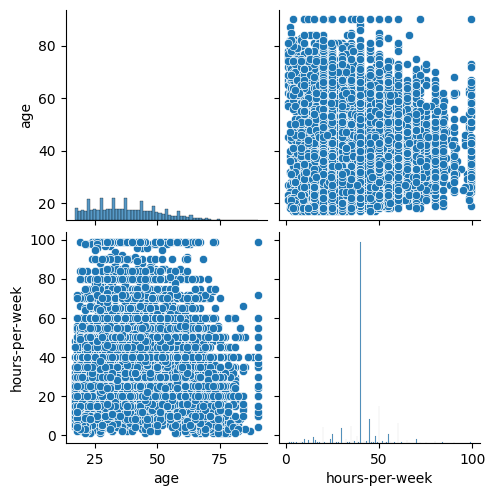

In [16]:
sns.pairplot(data)
plt.show()

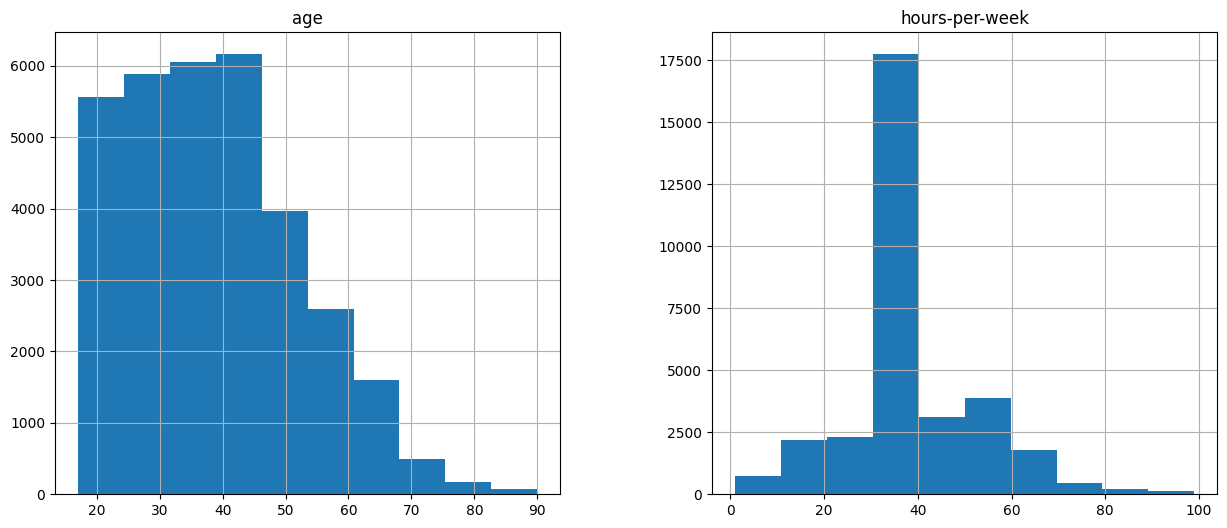

In [17]:
data.hist(figsize=(15,6))
plt.show()

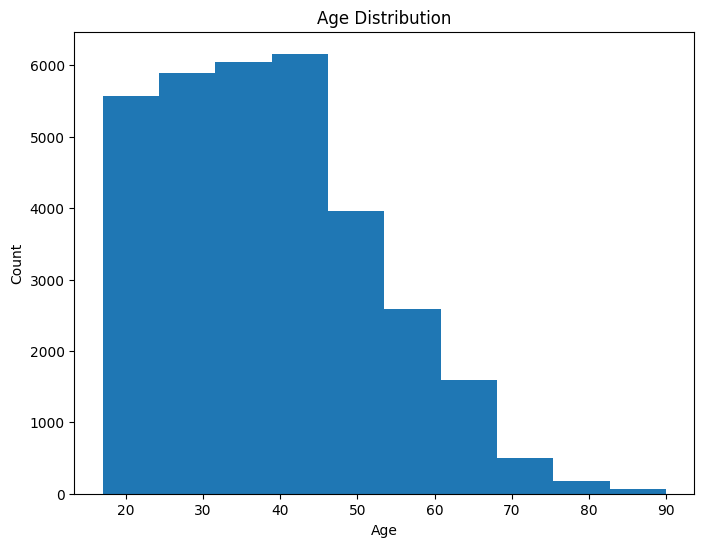

In [18]:
#We can check the above using some representations like graphs, barplots, etc

#checking age

plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
# plt.xticks(np.arange(20,100,5))
# plt.rcParams['figure.figsize'] = (8,8)
plt.title('Age Distribution')
plt.show()

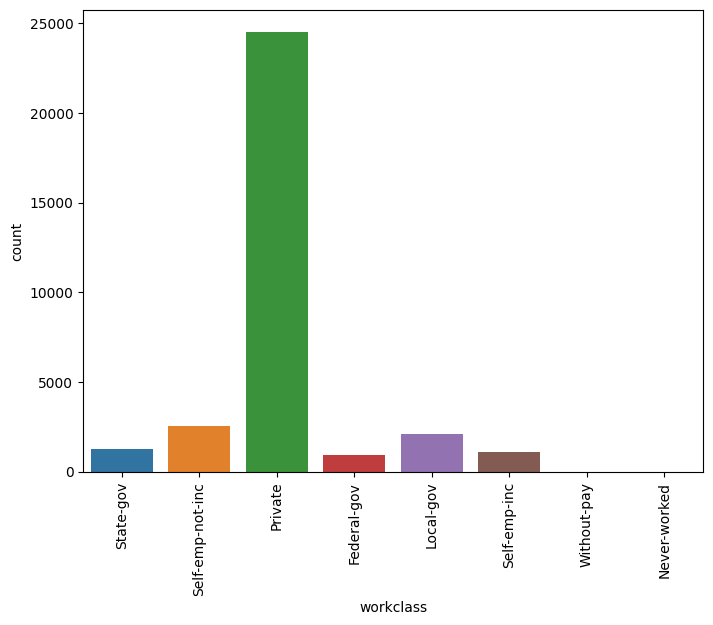

In [19]:
#checking workclass

sns.countplot(x = data['workclass'], data = data)
plt.xticks(rotation = 90)
plt.show()

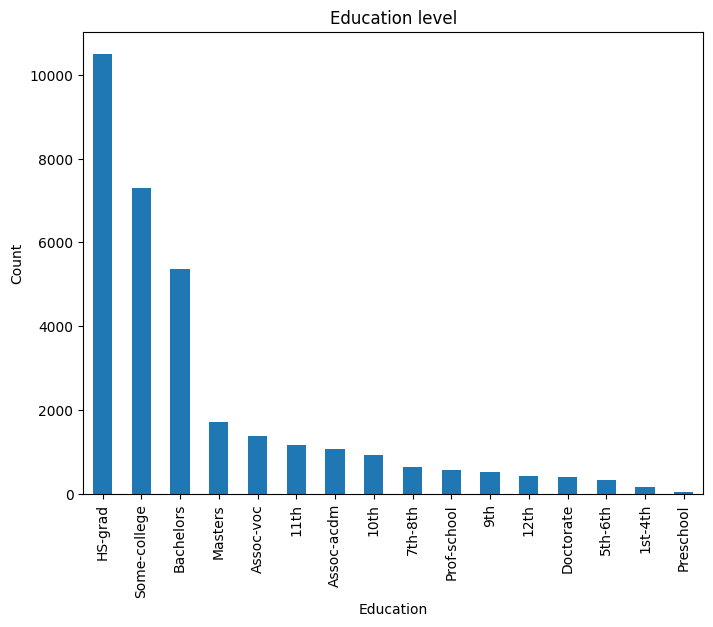

In [20]:
#checking education

data['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education level')
plt.show()

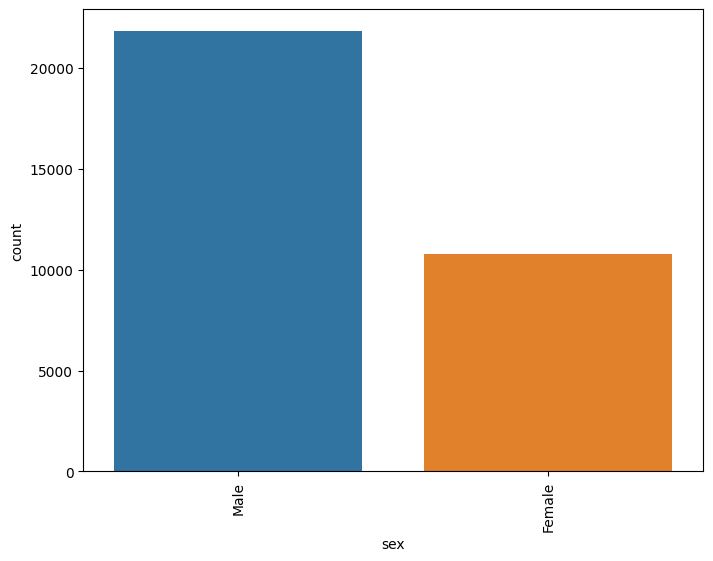

In [21]:
#checking sex

sns.countplot(x = data['sex'], data = data)
plt.xticks(rotation = 90)
plt.show()

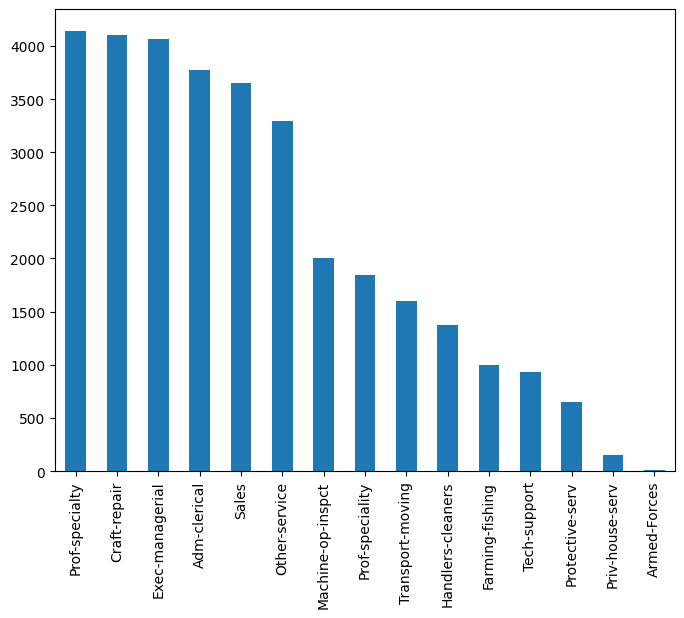

In [22]:
#checking occupation

data['occupation'].value_counts().plot(kind = 'bar')
plt.show()

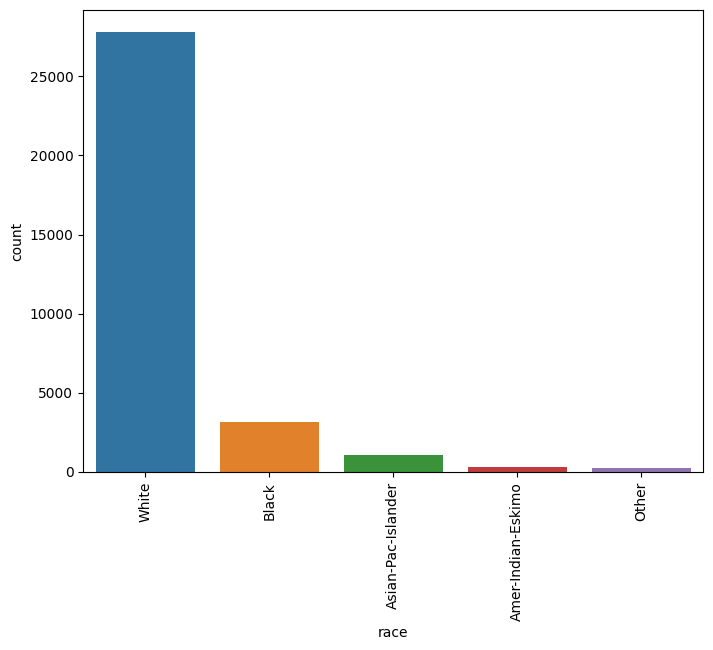

In [23]:
#Checking race

sns.countplot(x = data['race'], data = data)
plt.xticks(rotation = 90)
plt.show()

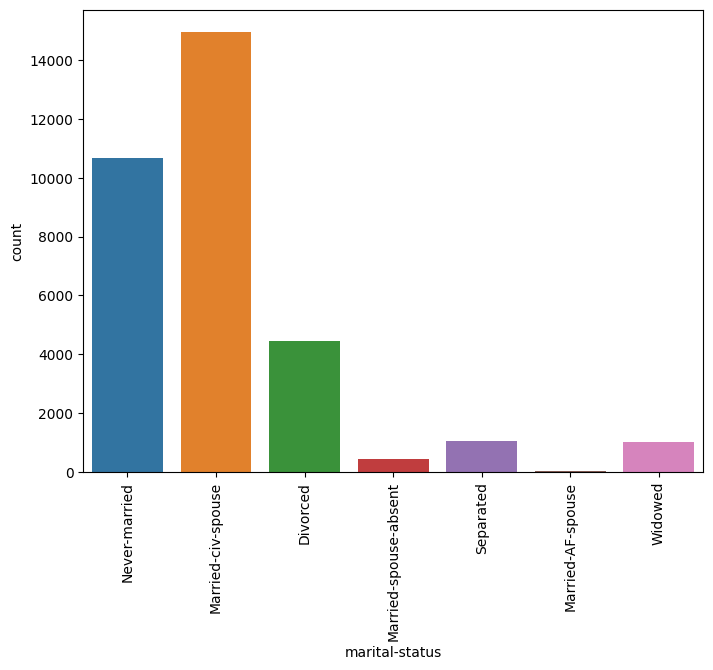

In [24]:
#checking marital-status

sns.countplot(x = data['marital-status'], data = data)
plt.xticks(rotation = 90)
plt.show()

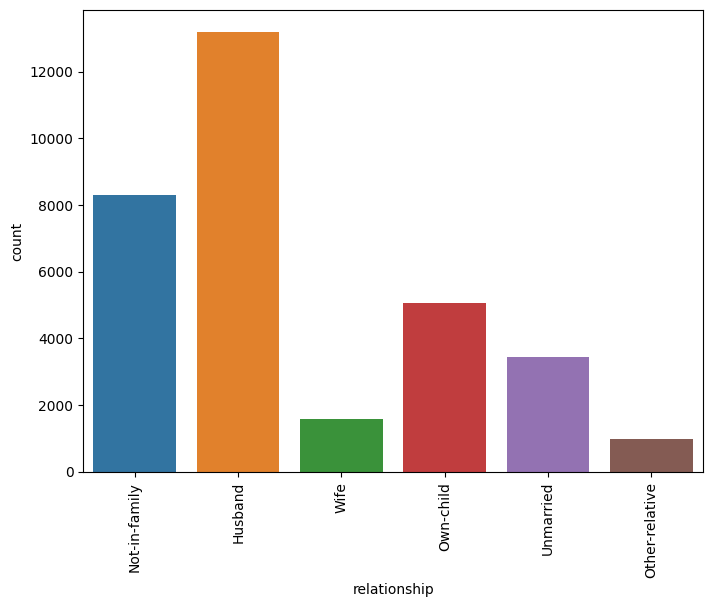

In [25]:
#checking relationship

sns.countplot(x = data['relationship'], data = data)
plt.xticks(rotation = 90)
plt.show()

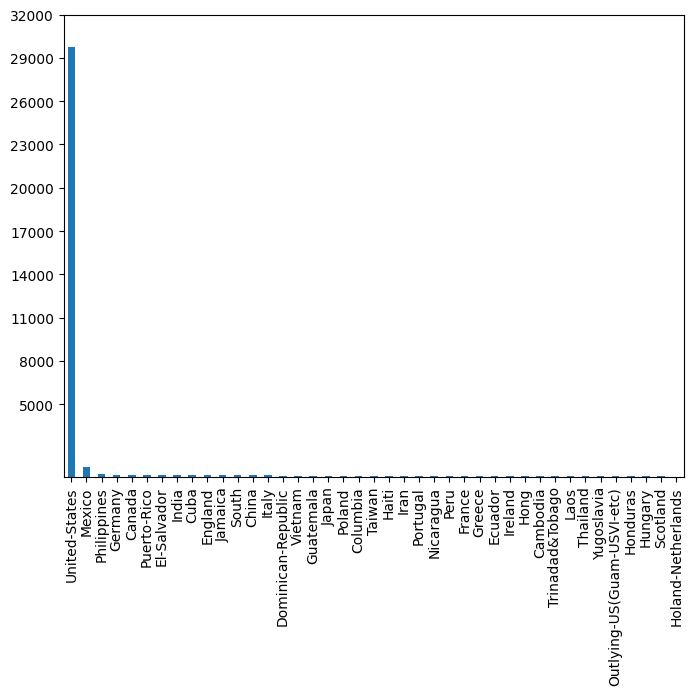

In [26]:
#checking native-country

data['native-country'].value_counts().plot(kind = 'bar')
plt.yticks(np.arange(5000,33000,3000))
plt.show()

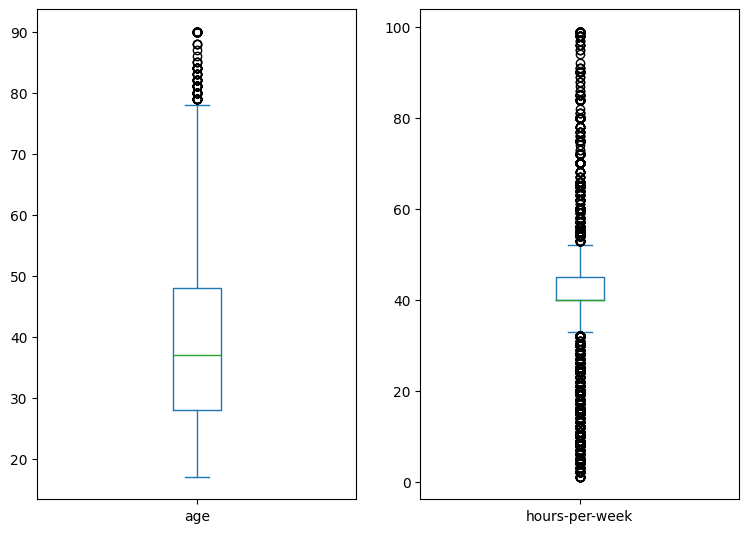

In [27]:
data.plot(kind='box',subplots=True,layout=(2,3),figsize=(14,14));

From the figure it is clear that age and hours-per-week have outliers. So we should remove it

In [28]:
#Outlier handling of age

Q1=np.percentile(data['age'],25,interpolation='midpoint')
Q2=np.percentile(data['age'],50,interpolation='midpoint')
Q3=np.percentile(data['age'],75,interpolation='midpoint')
IQR=Q3-Q1
print(Q1,Q2,Q3)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print('low_limit=',low_limit)
print('up_limit=',up_limit)
outlier=[]
for x in data['age']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

indA=data['age']>up_limit
indA1=data.loc[indA].index
indB=data['age']<low_limit
indB1=data.loc[indB].index

data.drop(indA1,inplace=True)
data.drop(indB1,inplace=True)

28.0 37.0 48.0
low_limit= -2.0
up_limit= 78.0


Text(0.5, 1.0, 'Box plot of age after removal of outlier')

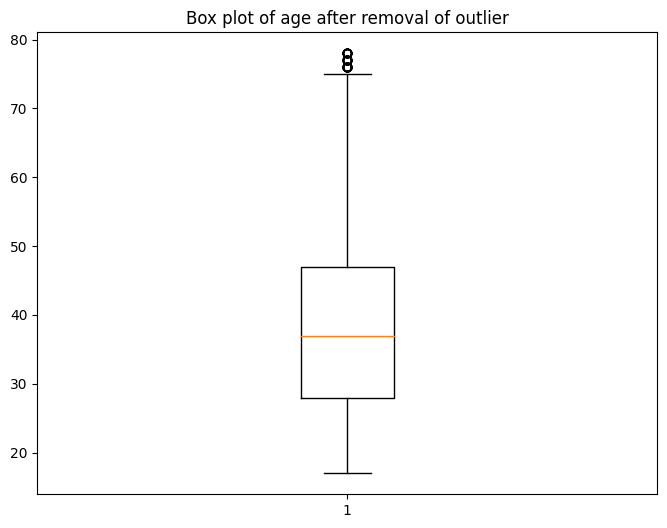

In [29]:
plt.boxplot(data['age'])
plt.title('Box plot of age after removal of outlier')

In [30]:
#Outlier handling of hours-per-week

Q1=np.percentile(data['hours-per-week'],25,interpolation='midpoint')
Q2=np.percentile(data['hours-per-week'],50,interpolation='midpoint')
Q3=np.percentile(data['hours-per-week'],75,interpolation='midpoint')
IQR=Q3-Q1
print(Q1,Q2,Q3)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print('low_limit=',low_limit)
print('up_limit=',up_limit)
outlier=[]
for x in data['hours-per-week']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

indA=data['hours-per-week']>up_limit
indA1=data.loc[indA].index
indB=data['hours-per-week']<low_limit
indB1=data.loc[indB].index

data.drop(indA1,inplace=True)
data.drop(indB1,inplace=True)

40.0 40.0 45.0
low_limit= 32.5
up_limit= 52.5


Text(0.5, 1.0, 'Box plot of hours-per-week after removal of outlier')

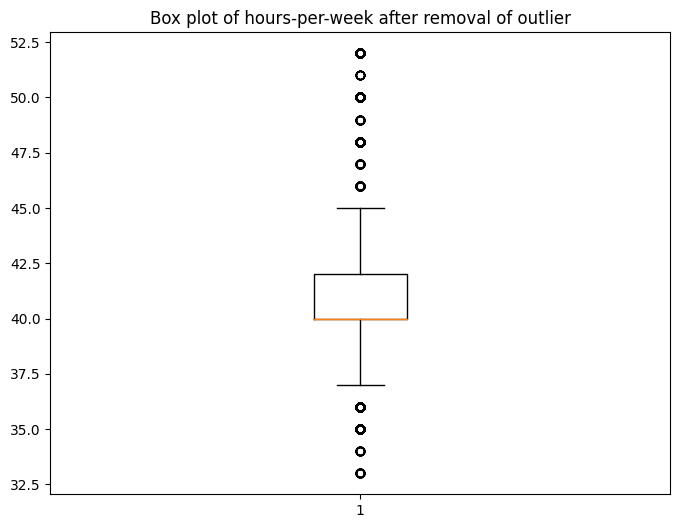

In [31]:
plt.boxplot(data['hours-per-week'])
plt.title('Box plot of hours-per-week after removal of outlier')

In [32]:
data.shape

(23499, 11)

Outliers are handled and shape reduced from (32561,14) to (23499,11)

###**Label Encoding**

In [33]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()

In [34]:
data['workclass']=label.fit_transform(data['workclass'])
data['education']=label.fit_transform(data['education'])
data['occupation']=label.fit_transform(data['occupation'])
data['sex']=label.fit_transform(data['sex'])
data['salary']=label.fit_transform(data['salary'])
data['race']=label.fit_transform(data['race'])
data['native-country']=label.fit_transform(data['native-country'])
data['marital-status']=label.fit_transform(data['marital-status'])
data['relationship']=label.fit_transform(data['relationship'])

In [35]:
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,6,9,4,0,1,4,1,40,38,0
2,38,3,11,0,5,1,4,1,40,38,0
3,53,3,1,2,5,0,2,1,40,38,0
4,28,3,9,2,10,5,2,0,40,4,0
5,37,3,12,2,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...
32555,22,3,15,4,11,1,4,1,40,38,0
32556,27,3,7,2,13,5,4,0,38,38,0
32557,40,3,11,2,6,0,4,1,40,38,1
32558,58,3,11,6,0,4,4,0,40,38,0


###**Standardization**

In [36]:
# Setting the feature and targert variables
X=data.drop(columns=['salary'],axis=1)
y=data['salary']
X.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,6,9,4,0,1,4,1,40,38
2,38,3,11,0,5,1,4,1,40,38
3,53,3,1,2,5,0,2,1,40,38
4,28,3,9,2,10,5,2,0,40,4
5,37,3,12,2,3,5,4,0,40,38


In [37]:
# Satandardizing the feature using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.02129829,  2.65135489, -0.36291919, ...,  0.67403711,
        -0.39054377,  0.26699709],
       [-0.06073556, -0.02804943,  0.17988309, ...,  0.67403711,
        -0.39054377,  0.26699709],
       [ 1.16977222, -0.02804943, -2.53412829, ...,  0.67403711,
        -0.39054377,  0.26699709],
       ...,
       [ 0.10333214, -0.02804943,  0.17988309, ...,  0.67403711,
        -0.39054377,  0.26699709],
       [ 1.57994149, -0.02804943,  0.17988309, ..., -1.48359783,
        -0.39054377,  0.26699709],
       [ 1.08773837,  0.86508535,  0.17988309, ..., -1.48359783,
        -0.39054377,  0.26699709]])

In [38]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16449, 10), (7050, 10), (16449,), (7050,))

###**Modeling**

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report

###**a. Logistic Regression**

In [41]:
# Fitting the training data to Logostic Regression Model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=2000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [42]:
# Predicting using test data
pred1=lr.predict(X_test)
pred1

array([0, 0, 1, ..., 0, 0, 1])

In [43]:
# Checking the confusion matrix and accuracy of the model
con_lr=confusion_matrix(y_test,pred1)
print("The confusion matrix of logistic regression is \n",con_lr)

ac_lr=accuracy_score(y_test,pred1)
print('Accuracy:',ac_lr*100)

The confusion matrix of logistic regression is 
 [[4930  326]
 [1377  417]]
Accuracy: 75.84397163120568


In [44]:
# Classification Report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      5256
           1       0.56      0.23      0.33      1794

    accuracy                           0.76      7050
   macro avg       0.67      0.59      0.59      7050
weighted avg       0.73      0.76      0.72      7050



### **b. K Nearest Neighbour Classifier**

In [45]:
# Fitting the training data to KNNClassifier Model
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(70,90)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    pred2=knn.predict(X_test)
    ac_knn=accuracy_score(y_test,pred2)
    acc_values.append(ac_knn)

In [46]:
acc_values

[0.7974468085106383,
 0.7978723404255319,
 0.7963120567375886,
 0.7974468085106383,
 0.795177304964539,
 0.7964539007092198,
 0.7947517730496454,
 0.7968794326241134,
 0.7948936170212766,
 0.7963120567375886,
 0.7956028368794327,
 0.7953191489361702,
 0.7940425531914893,
 0.7956028368794327,
 0.7941843971631206,
 0.796595744680851,
 0.7953191489361702,
 0.7960283687943263,
 0.7957446808510639,
 0.7960283687943263]

In [47]:
# Checking the average accuracy of the model
avg_acc = np.array(acc_values).mean()
print('Accuracy: ', avg_acc * 100)

Accuracy:  79.59007092198583


Text(0, 0.5, 'accuracy')

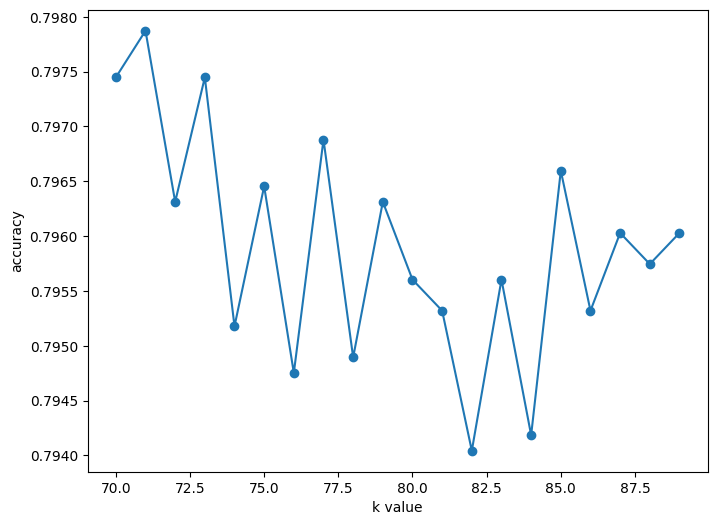

In [48]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [49]:
# Classification Report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5256
           1       0.61      0.53      0.57      1794

    accuracy                           0.80      7050
   macro avg       0.73      0.71      0.72      7050
weighted avg       0.79      0.80      0.79      7050



### **c. Support Vector Machine**

In [51]:
# Fitting the training data to SVC Model
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [52]:
# Predicting using test data
pred3=svc.predict(X_test)
pred3

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
# Checking the confusion matrix and accuracy of the model
con_svc=confusion_matrix(y_test,pred3)
print("The confusion matrix of decision tree is \n",con_svc)

ac_svc=accuracy_score(y_test,pred3)
print('Accuracy:',ac_svc*100)

The confusion matrix of decision tree is 
 [[4727  529]
 [ 942  852]]
Accuracy: 79.13475177304964


In [54]:
# Classification Report
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      5256
           1       0.62      0.47      0.54      1794

    accuracy                           0.79      7050
   macro avg       0.73      0.69      0.70      7050
weighted avg       0.78      0.79      0.78      7050



### **d. Decision Tree classifier**

In [55]:
# Fitting the training data to Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
# Predicting using test data
pred4=dt_clf.predict(X_test)
pred4

array([0, 0, 1, ..., 0, 1, 1])

In [58]:
# Checking the confusion matrix and accuracy of the model
con_dtr=confusion_matrix(y_test,pred4)
print("The confusion matrix of decision tree is \n",con_dtr)

ac_dt=accuracy_score(y_test,pred4)
print('Accuracy:',ac_dt*100)

The confusion matrix of decision tree is 
 [[4441  815]
 [ 867  927]]
Accuracy: 76.1418439716312


In [59]:
# Classification Report
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5256
           1       0.53      0.52      0.52      1794

    accuracy                           0.76      7050
   macro avg       0.68      0.68      0.68      7050
weighted avg       0.76      0.76      0.76      7050



### **e.Random Forest Classifier**

In [60]:
# Fitting the training data to Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
# Predicting using test data
pred5=rf.predict(X_test)
pred5

array([0, 0, 1, ..., 0, 1, 1])

In [62]:
# Checking the confusion matrix and accuracy of the model
con_rf=confusion_matrix(y_test,pred5)
print("The confusion matrix of random forest is \n",con_rf)

ac_rf=accuracy_score(y_test,pred5)
print('Accuracy:',ac_rf*100)

The confusion matrix of random forest is 
 [[4640  616]
 [ 812  982]]
Accuracy: 79.74468085106383


In [63]:
# Classification Report
print(classification_report(y_test, pred5))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      5256
           1       0.61      0.55      0.58      1794

    accuracy                           0.80      7050
   macro avg       0.73      0.72      0.72      7050
weighted avg       0.79      0.80      0.79      7050



### **Summary of accuracies of different models**

In [64]:
# Tabulating the accuracies of different models
from tabulate import tabulate
table = [['Model', 'Accuracy'], ['Logistic Regression',ac_lr], ['KNN',avg_acc], ['Decision tree',ac_dt], ["SVM",ac_svc], ['Random Forest',ac_rf]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │   0.75844  │
├─────────────────────┼────────────┤
│ KNN                 │   0.795901 │
├─────────────────────┼────────────┤
│ Decision tree       │   0.761418 │
├─────────────────────┼────────────┤
│ SVM                 │   0.791348 │
├─────────────────────┼────────────┤
│ Random Forest       │   0.797447 │
╘═════════════════════╧════════════╛


From the table, it is clear that Random forest have better accuracy compared to others.So Random forest is taken as our model to predict the salary.So we can tune this to check whether the performance is improving.

Hyper parameter tuning of Random Forest Model

In [65]:
# Fittin the training set
rf=RandomForestClassifier(criterion='gini',max_depth=10,n_estimators=600)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=600)

In [66]:
# Passing the test set
y_pr=rf.predict(X_test)
y_pr

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
# Checking the accuracy
acc_sc=accuracy_score(y_test,y_pr)*100
print('Accuracy: ', acc_sc)

Accuracy:  82.60992907801419


Hyper parameter tuning improved the accuracy of Random forest modeling to 82.61%.

So we can take random forest classifier to build our model.